In [31]:
# !pip install plotly
!pip install --upgrade nbformat


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import  WordCloud
from IPython.display import Image

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df_train = pd.read_csv("../dataset/GoEmotion/data/train.tsv", sep='\t', header=None, names=['Text','Class','ID'])
df_dev = pd.read_csv("../dataset/GoEmotion/data/dev.tsv", sep='\t', header=None, names=['Text','Class','ID'])
df_test = pd.read_csv("../dataset/GoEmotion/data/test.tsv", sep='\t', header=None, names=['Text','Class','ID'])

In [3]:
df_train.head()

,Text,Class,ID
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,14,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj


In [4]:
# df_train['Class'].apply(lambda x: x.split(','))
df_train['List of classes'] = df_train['Class'].apply(lambda x:x.split(','))

In [5]:
df_train['Len of classes'] = df_train['List of classes'].apply(lambda x:len(x))

In [6]:
df_train['Len of classes'].max()

np.int64(5)

In [7]:
df_train[df_train['Len of classes'] == 5]

,Text,Class,ID,List of classes,Len of classes
7873,Yeah I probably would've started crying on the...,"9,12,14,19,25",ee6lqiq,"[9, 12, 14, 19, 25]",5


In [8]:
temp_df = df_train['Len of classes'].value_counts().sort_index()


plot1 = go.Bar(
    x = ['1','2','3','4','5'],
    y = temp_df.tolist(),
    marker = dict(color='rgb(250,13,92)', line=dict(color='rgb(0,0,0)',width=1.5)),
    text = temp_df.tolist(),
    textposition = 'outside',
    width = [0.5,0.5,0.5,0.5,0.5]
) 
layout = go.Layout(
    template = "plotly_dark",
    title = 'Number of classes',
    xaxis = dict(title = 'Class Numbers'),
    yaxis = dict(title = 'Count')
)
fig = go.Figure(data=[plot1], layout=layout)
fig.show()

In [9]:
emotion_map = {}
with open('../dataset/GoEmotion/data/emotions.txt','r') as f:
    for i,emotion in enumerate(f):
        emotion_map[str(i)] = emotion.strip()
emotion_map

{'0': 'admiration',
 '1': 'amusement',
 '2': 'anger',
 '3': 'annoyance',
 '4': 'approval',
 '5': 'caring',
 '6': 'confusion',
 '7': 'curiosity',
 '8': 'desire',
 '9': 'disappointment',
 '10': 'disapproval',
 '11': 'disgust',
 '12': 'embarrassment',
 '13': 'excitement',
 '14': 'fear',
 '15': 'gratitude',
 '16': 'grief',
 '17': 'joy',
 '18': 'love',
 '19': 'nervousness',
 '20': 'optimism',
 '21': 'pride',
 '22': 'realization',
 '23': 'relief',
 '24': 'remorse',
 '25': 'sadness',
 '26': 'surprise',
 '27': 'neutral'}

In [11]:
for i in emotion_map:
    df_train[emotion_map[i]] = df_train['List of classes'].apply(lambda x: 1 if i in x else 0) 

In [12]:
df_train.drop(['Class','ID','List of classes', 'Len of classes'], axis=1, inplace=True)

In [13]:
df_train.head()

,Text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
emotion_list = list(emotion_map.values())
temp_list = df_train.drop(['Text'], axis=1).sum(axis=0).tolist()
plot2 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [plot2], layout = layout)
fig.show()

In [15]:
df_emotions = pd.read_csv("../dataset/GoEmotion/tables/emotion_words.csv")

In [16]:
df_emotions.head()

,emotion,word,odds,freq
0,admiration,great,41.80,0.014
1,admiration,awesome,31.18,0.007
2,admiration,amazing,29.65,0.006
3,admiration,good,26.87,0.016
4,admiration,beautiful,22.87,0.004


In [17]:
wc_dict = {}
for i in df_emotions['emotion'].unique():
    wc_dict[i] = {}
    odds_list = df_emotions[df_emotions['emotion'] == i]['odds'].tolist()
    word_list = df_emotions[df_emotions['emotion'] == i]['word'].tolist()
    wc_dict[i] = dict(dict(zip(word_list,odds_list)))
wc_dict

{'admiration': {'great': 41.8,
  'awesome': 31.18,
  'amazing': 29.65,
  'good': 26.87,
  'beautiful': 22.87,
  'nice': 20.57,
  'appreciate': 17.56,
  'cute': 17.55,
  'best': 17.26,
  'pretty': 13.86,
  'fantastic': 13.15,
  'cool': 10.94,
  'excellent': 10.83,
  'brilliant': 9.96,
  'adorable': 9.89,
  'wonderful': 9.85,
  'incredible': 9.79,
  'job': 9.77,
  'gorgeous': 9.58,
  'impressive': 9.55,
  'wow': 9.23,
  'looks': 8.41,
  'perfect': 8.2,
  'congrats': 8.17,
  'handsome': 7.9,
  'such': 7.7,
  'impressed': 7.66,
  'appreciated': 7.36,
  'genius': 7.23,
  'congratulations': 7.21,
  'interesting': 7.18,
  'proud': 6.85,
  'sweet': 6.6,
  'very': 6.53,
  'favorite': 6.49,
  'delicious': 6.42,
  'sexy': 6.21,
  'legend': 6.15,
  'super': 6.14,
  'stunning': 6.05,
  'brave': 5.56,
  'glorious': 5.35,
  'this': 5.35,
  'ever': 5.23,
  'really': 5.18,
  'greatest': 5.13,
  'beauty': 5.13,
  'art': 4.89,
  'applaud': 4.82,
  'honesty': 4.81,
  'idea': 4.7,
  'nailed': 4.49,
  'smar

In [18]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='black', colormap='Set2', collocations=False)


### Admiration

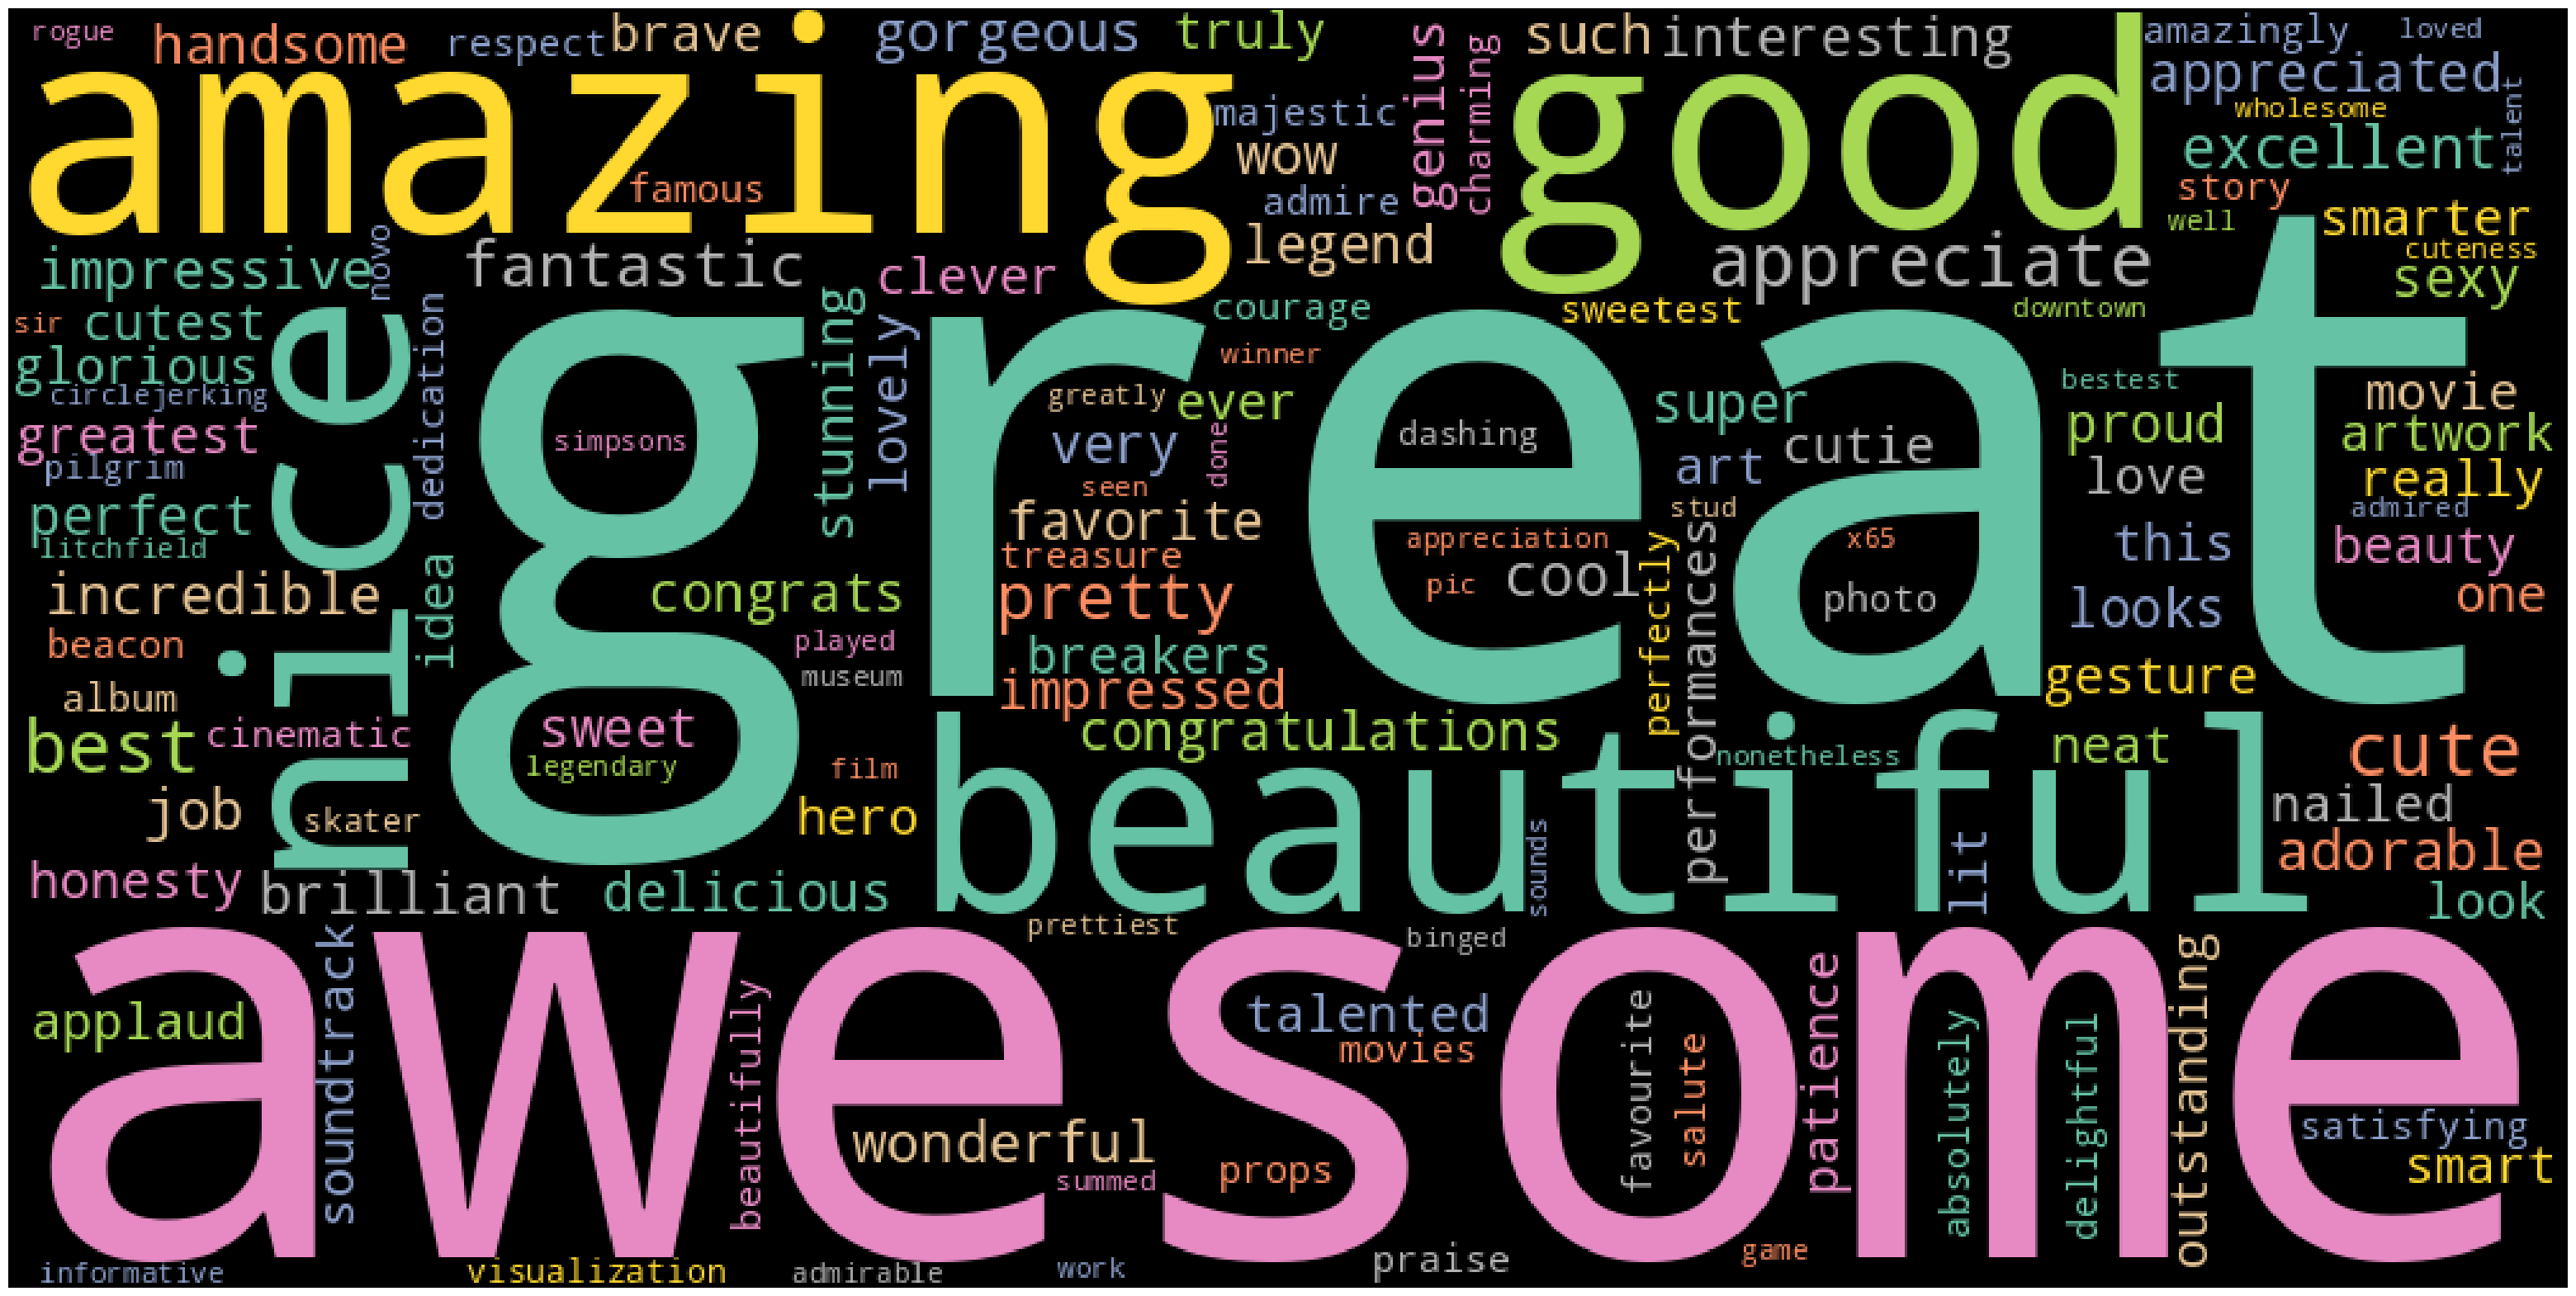

In [19]:
plot_cloud(wordcloud.generate_from_frequencies(wc_dict['admiration']))

### Ammusement

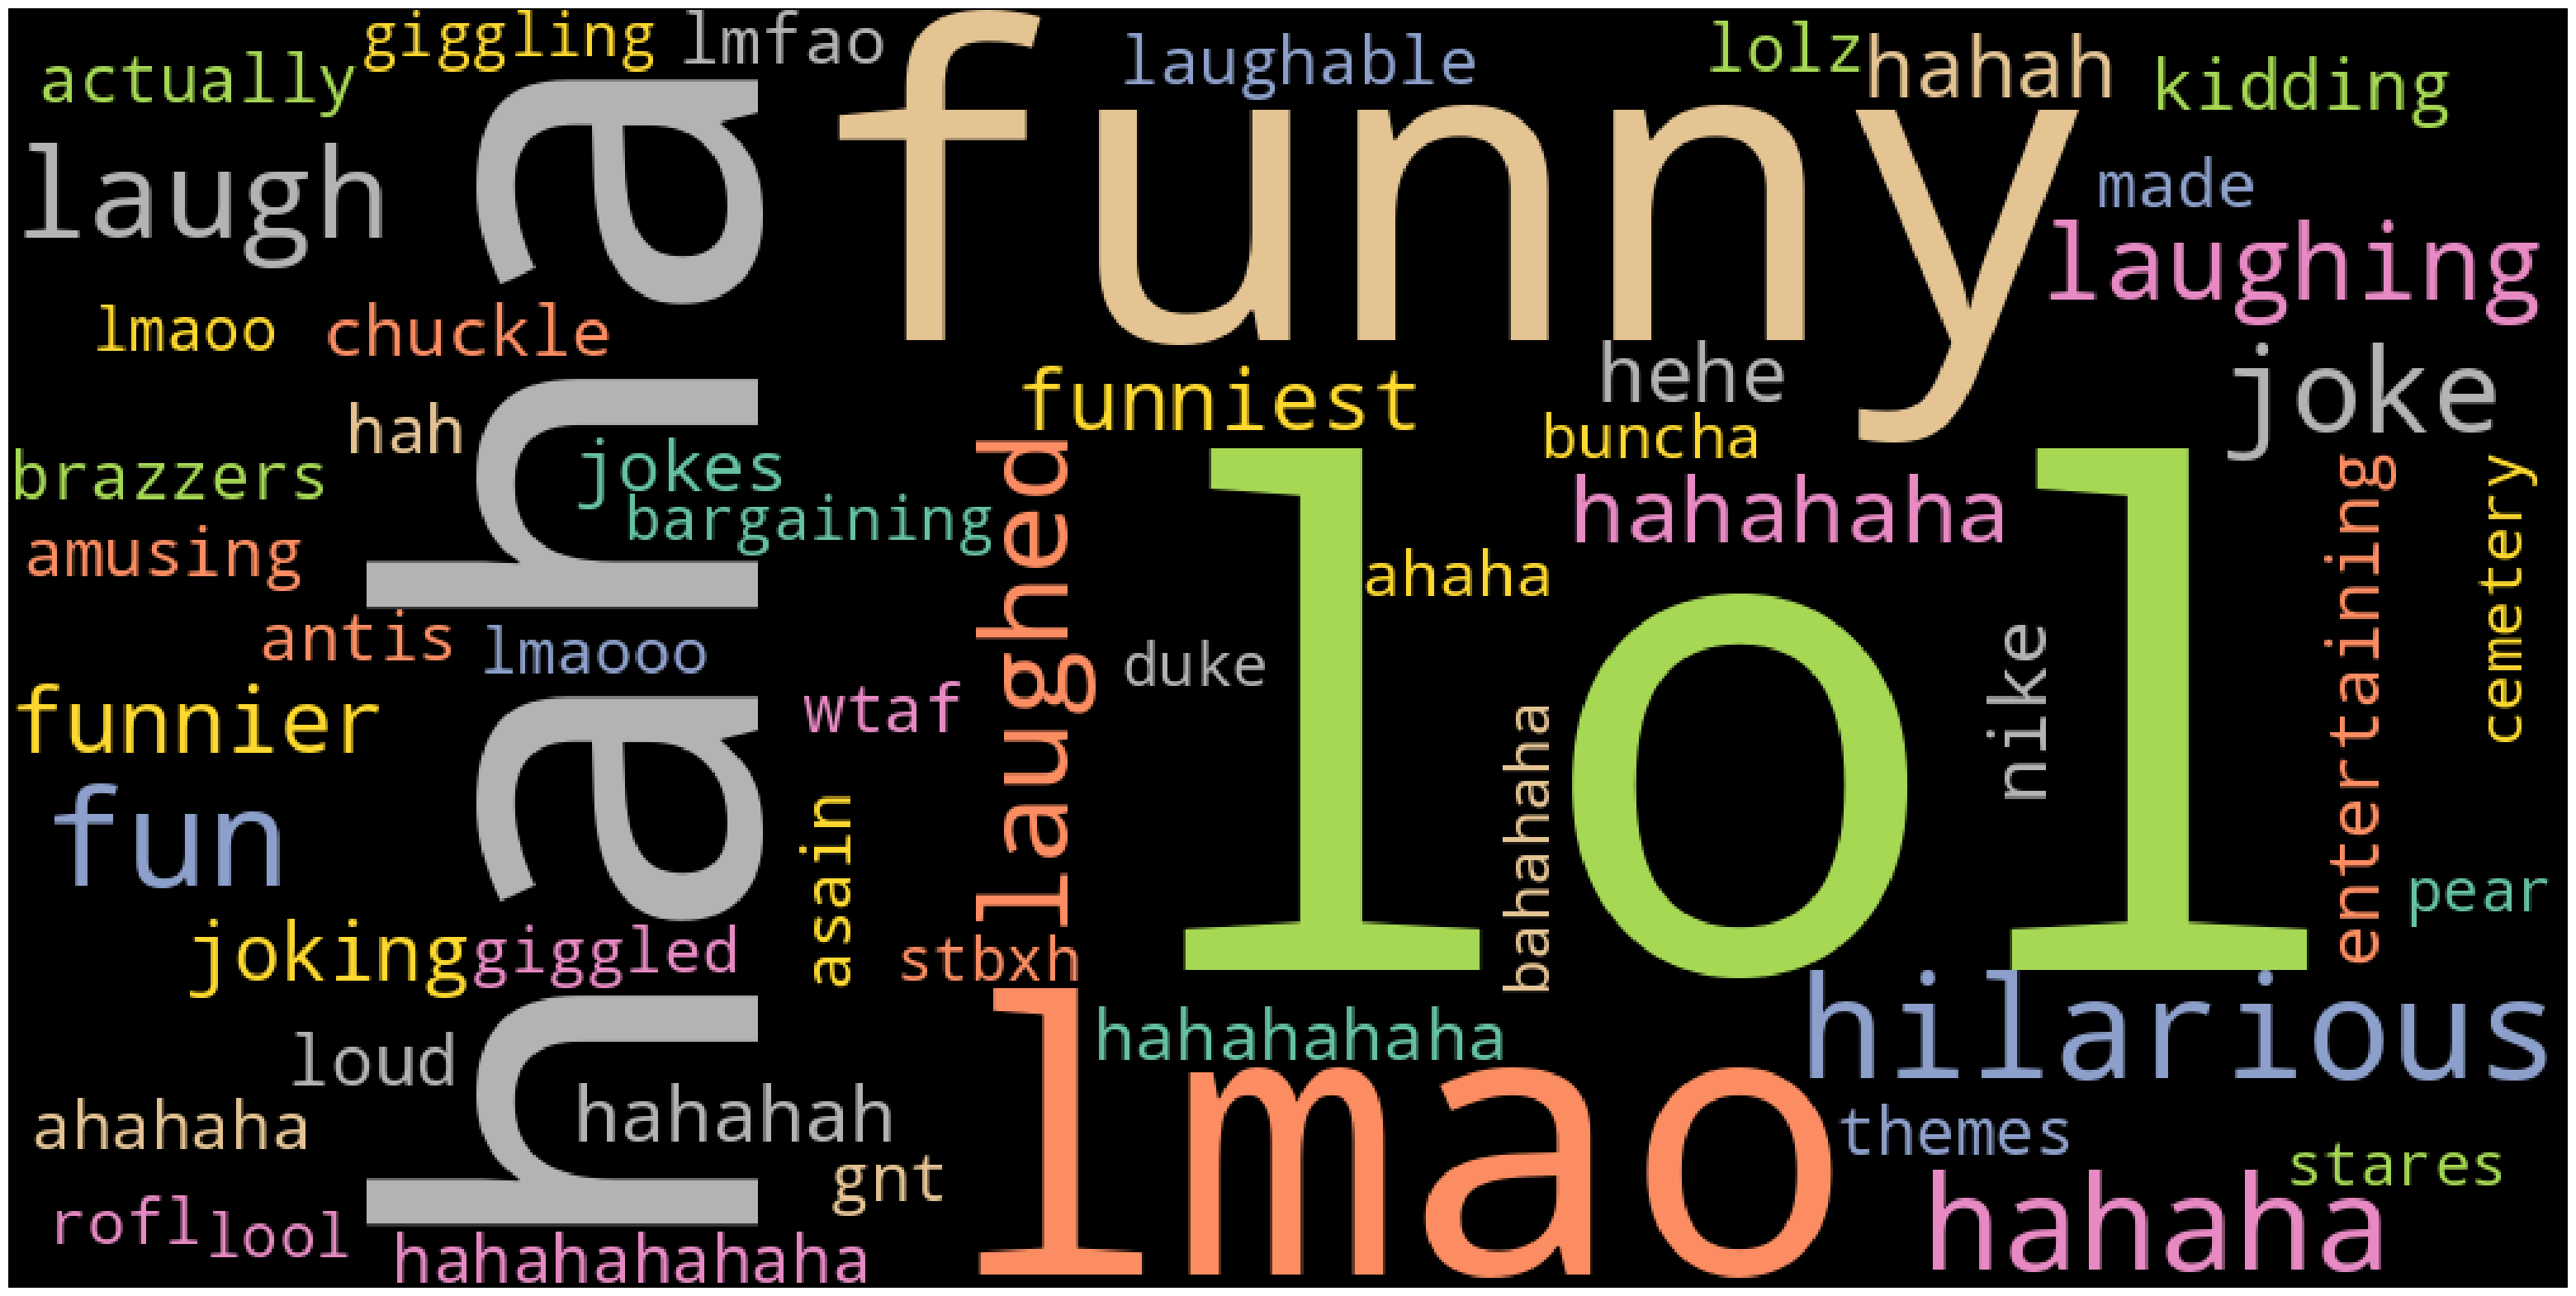

In [20]:
plot_cloud(wordcloud.generate_from_frequencies(wc_dict['amusement']))

### Anger

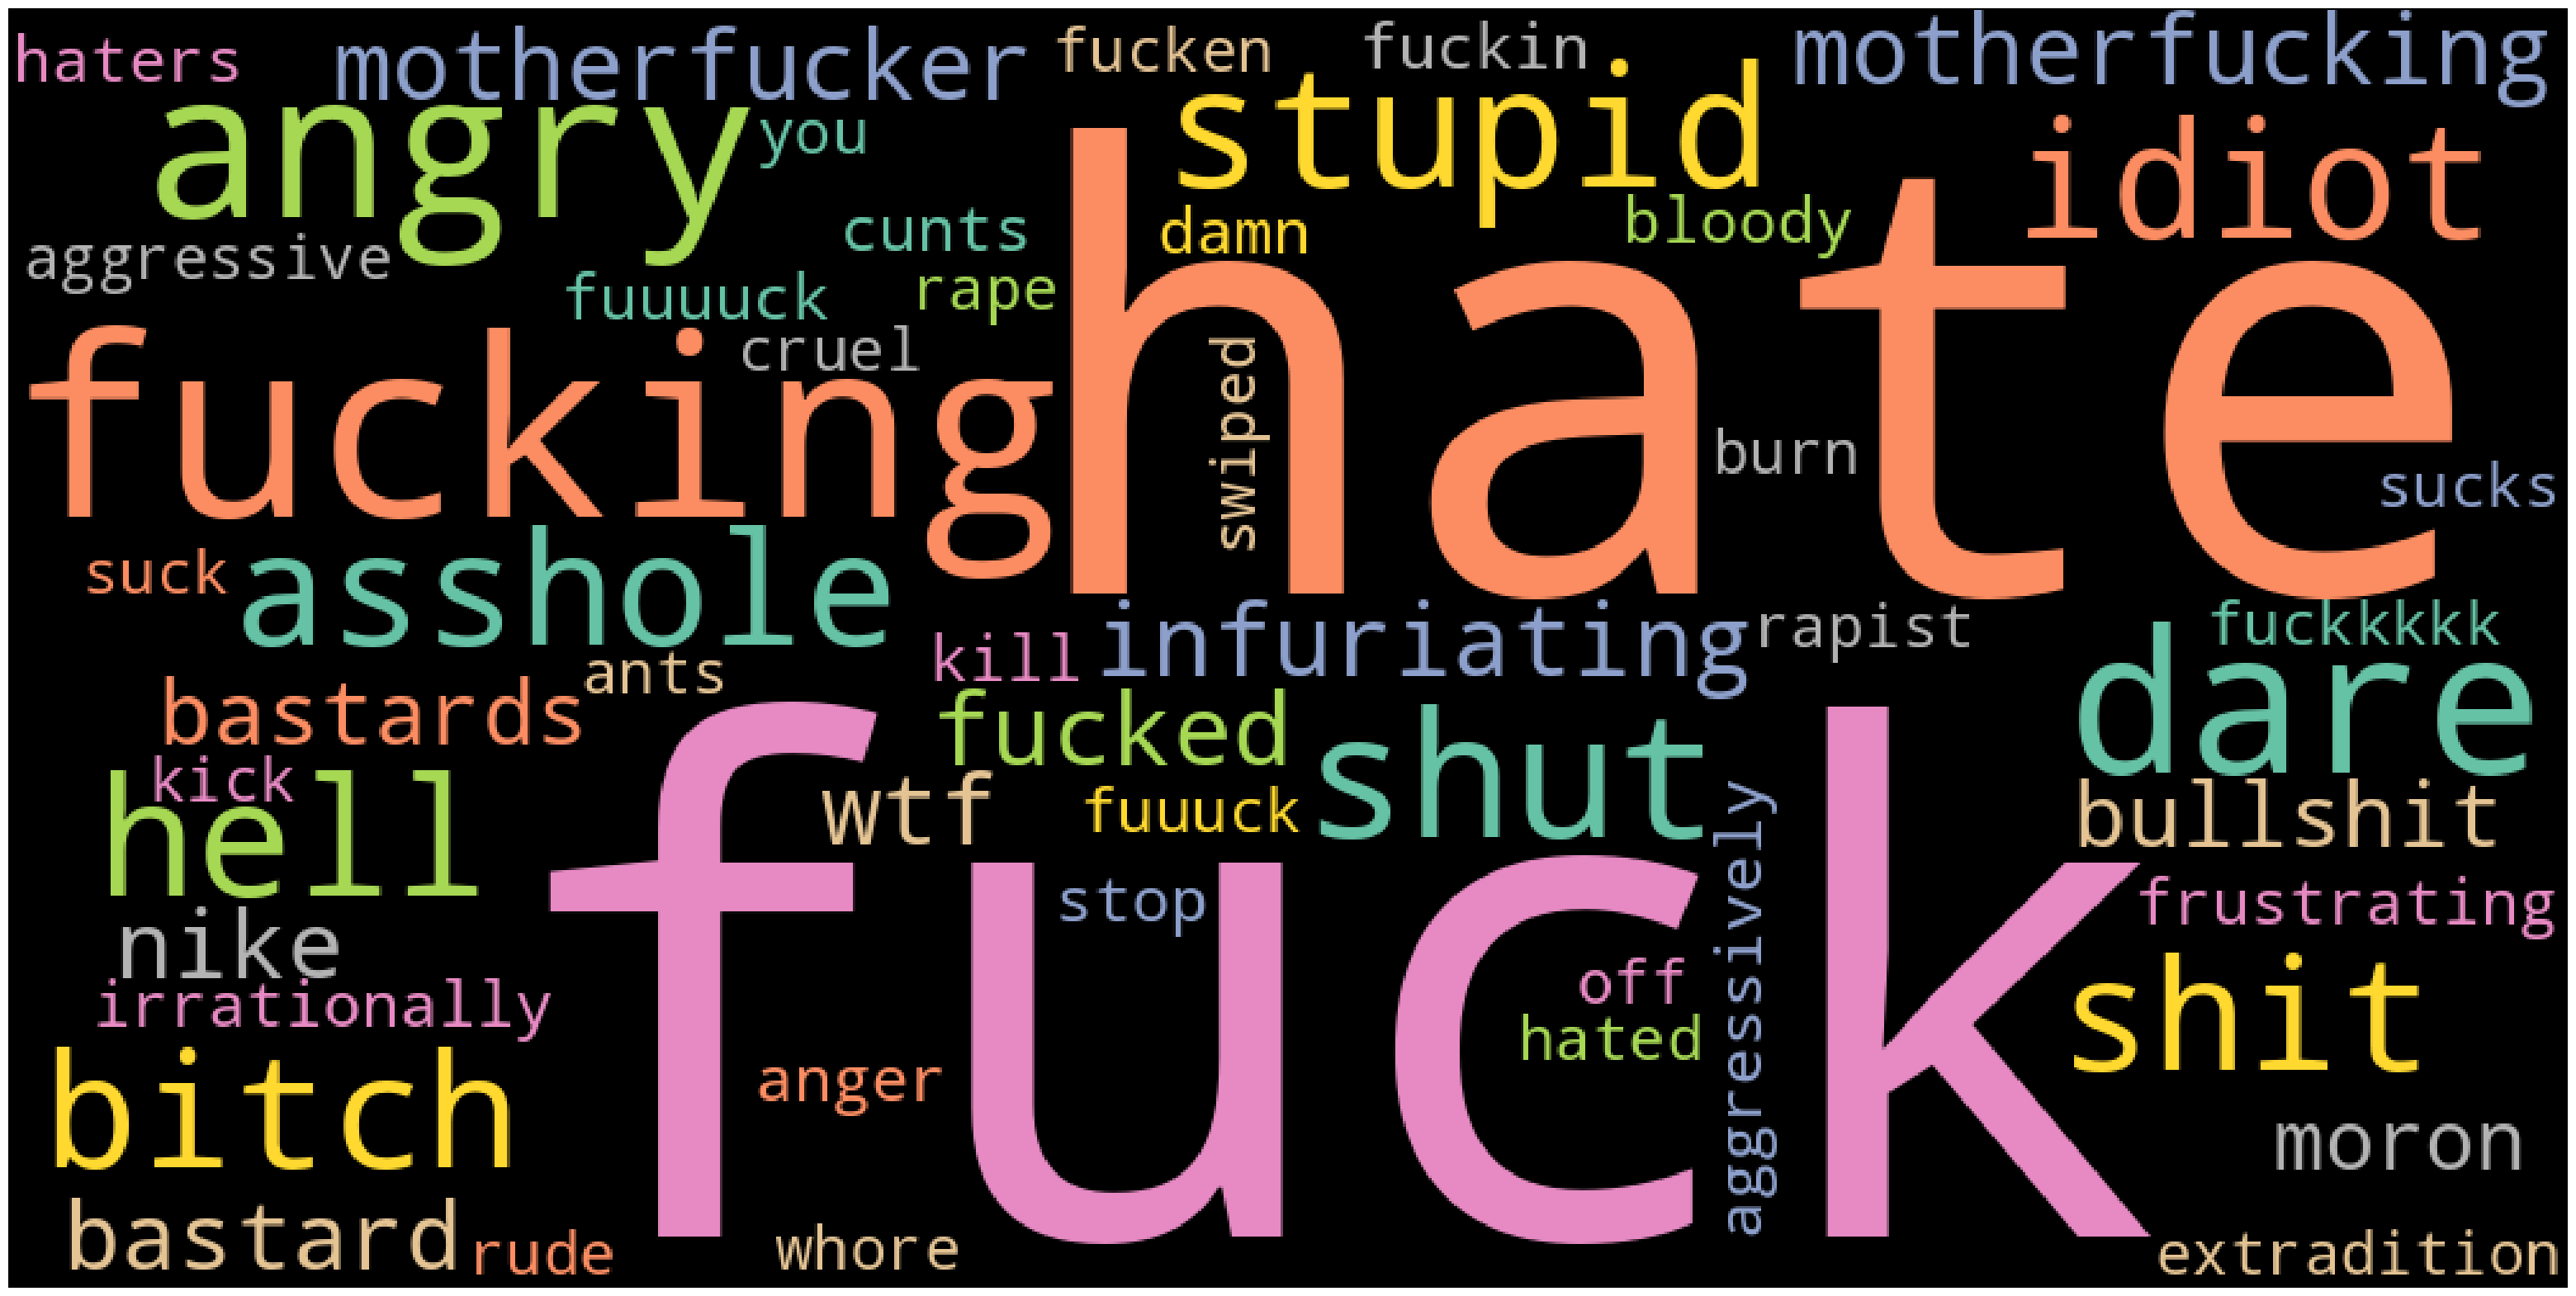

In [21]:
plot_cloud(wordcloud.generate_from_frequencies(wc_dict['anger']))